# Analyze Star Wars Survey Data to understand fan favorites

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
star_wars = pd.read_csv("star_wars.csv")
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


## Get rid of rows with null Respondent IDs

In [57]:
star_wars = star_wars[star_wars.RespondentID.notna()].copy()

# View column names

In [58]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [12]:
star_wars.shape

(1187, 38)

# Map Yes/No answers in 2nd and 3rd column to True/False for easier analysis

In [31]:
columns = star_wars.columns[1:3]

In [14]:
columns

Index(['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?'], dtype='object')

In [17]:
def convert_to_boolean(column):
    return column.map({"Yes": True,"No": False})

In [59]:
star_wars[columns] = star_wars[columns].apply(convert_to_boolean)

In [60]:
star_wars["Unnamed: 5"].unique()

array(['Star Wars: Episode III  Revenge of the Sith', nan], dtype=object)

In [61]:
movies = ["Star Wars: Episode I  The Phantom Menace","Star Wars: Episode II  Attack of the Clones","Star Wars: Episode III  Revenge of the Sith","Star Wars: Episode IV  A New Hope","Star Wars: Episode V The Empire Strikes Back","Star Wars: Episode VI Return of the Jedi"]
for i,column_number in enumerate(range(3,9)):
    if i == 0:
        star_wars["Which of the following Star Wars films have you seen? Please select all that apply."] = star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].map({movies[i]: True,np.nan: False})
    else:
        star_wars[f"Unnamed: {column_number}"] = star_wars[f"Unnamed: {column_number}"].map({movies[i]: True,np.nan: False})

In [63]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Rename columns to be more intuitive

In [66]:
for i,column in enumerate(star_wars.columns[3:9]):
    star_wars.rename({column: f"seen_{i + 1}"},axis=1,inplace=True)

In [67]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [68]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [69]:
for i,column in enumerate(star_wars.columns[9:15]):
    star_wars.rename({column: f"ranking_{i +1}"},axis=1,inplace=True)

# Find Highest Rated Movie

In [73]:
rankings = star_wars[star_wars.columns[9:15]].mean()

Text(0, 0.5, 'Ranking(1-6)')

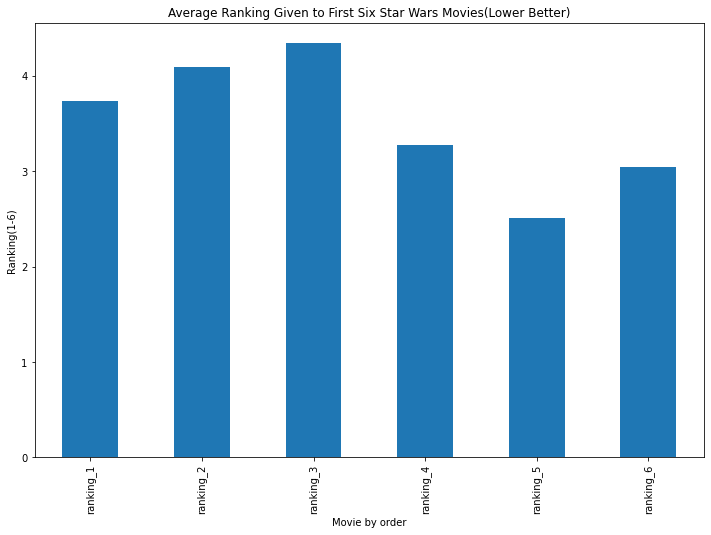

In [77]:
ax = rankings.plot(kind='bar',figsize=(12,8))
ax.set_title("Average Ranking Given to First Six Star Wars Movies(Lower Better)")
ax.set_xlabel("Movie by order")
ax.set_ylabel("Ranking(1-6)")

# Empire Strikes Back was highest ranked movie and the original trilogy all ranked than the prequels

<hr>

# Find the Most Viewed Movie

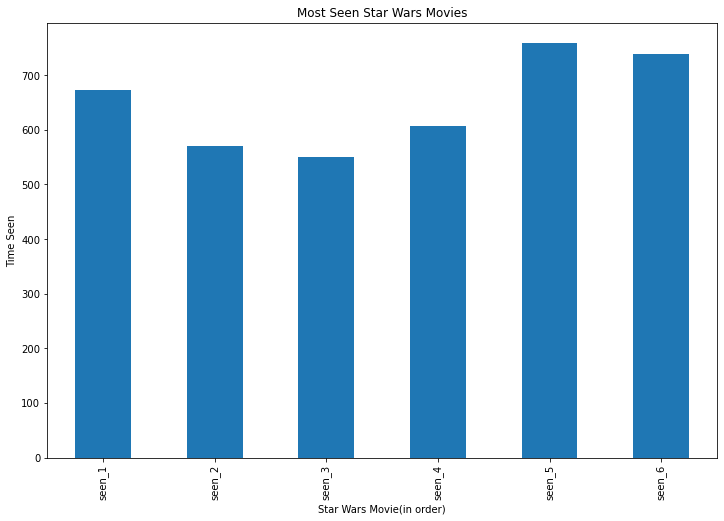

In [84]:
ax = star_wars[star_wars.columns[3:9]].sum().plot(kind='bar',figsize=(12,8))
ax.set_title("Most Seen Star Wars Movies")
ax.set_xlabel("Star Wars Movie(in order)");
ax.set_ylabel("Time Seen");

# The sequels were seen more than than the prequels, particularly last two. In addition, Phantom Menance was only movie seen more than one of the prequels(Possibly due to hype of Star Wars Returns) but the views for Attack of Clones and Revenge of the Sith descreased

<hr>

# Group Analysis

## First Group by Whether Star Wars Fan or Not

In [88]:
def find_highest_rated_movies(group):
    return group[group.columns[9:15]].mean()

In [104]:
def find_most_watched_movies(group):
    return group[group.columns[3:9]].sum()

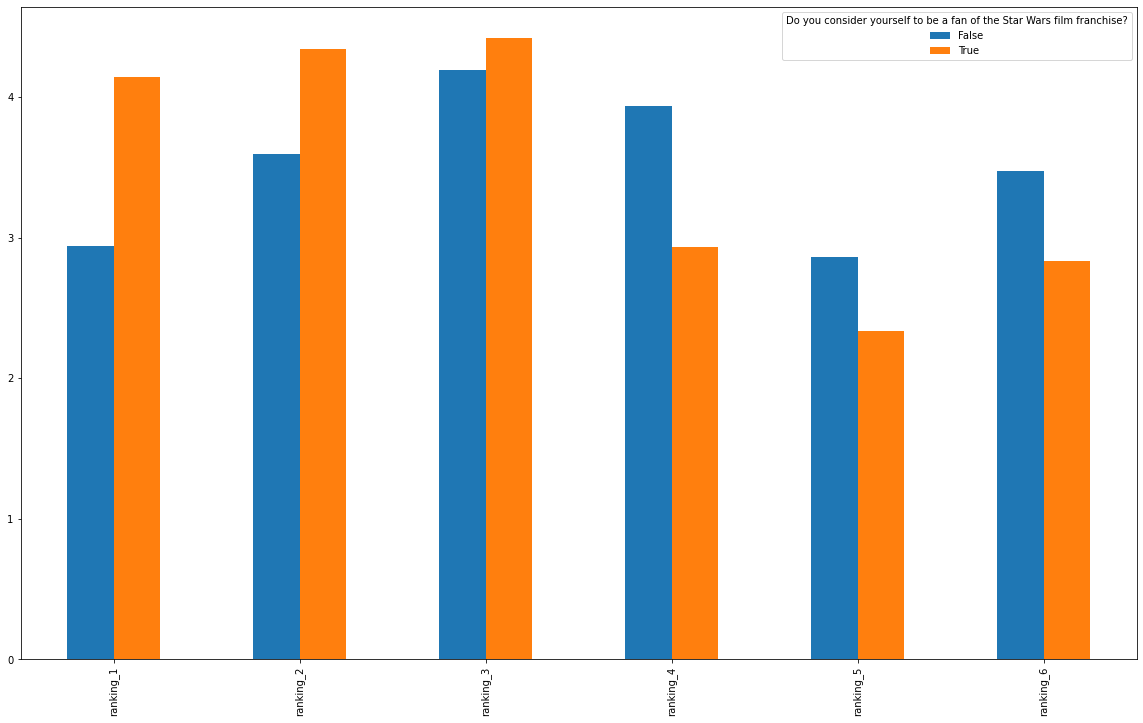

In [95]:
star_wars.groupby(star_wars.columns[2]).apply(find_highest_rated_movies).T.plot(kind='bar',figsize=(20,12))

# People who do not consider themselves Star Wars fans like rated the newer movies higher

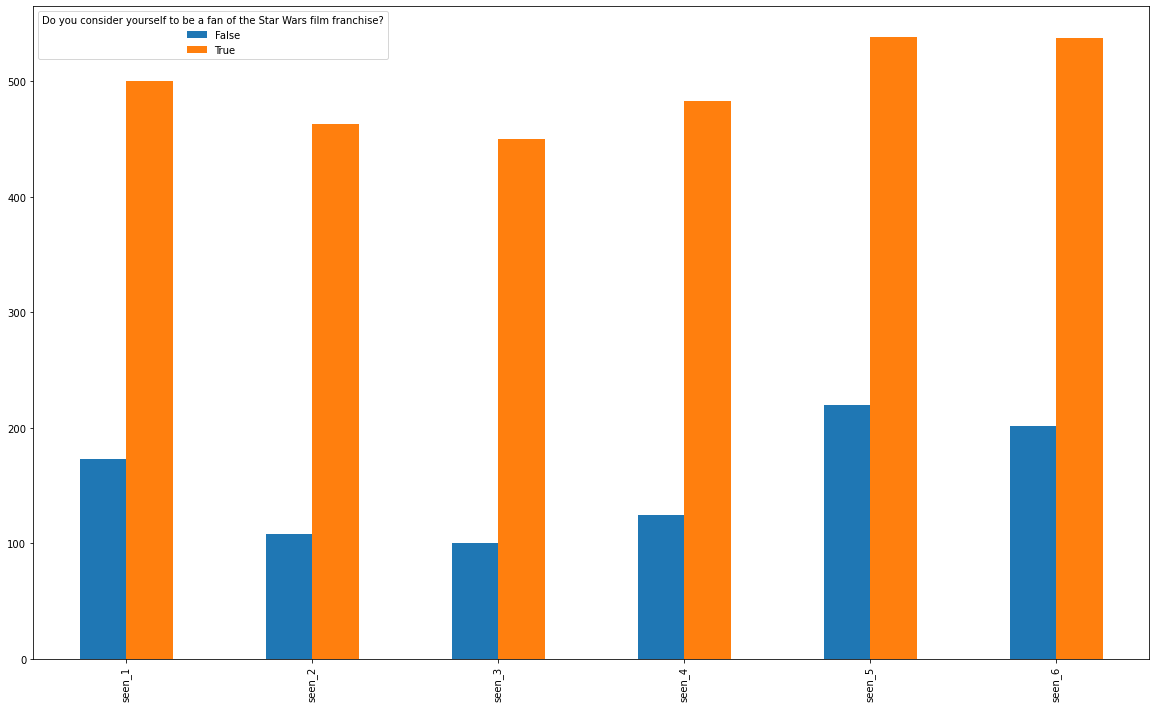

In [105]:
star_wars.groupby(star_wars.columns[2]).apply(find_most_watched_movies).T.plot(kind='bar',figsize=(20,12))

# Regarding most watched files stratified by fan status, the last two were seen most regardless of status. Not many fans watched movies 2-5. Star Wars fan watched more which is to be expected

<hr>

# Stratify by whether fan of Star Trek universe

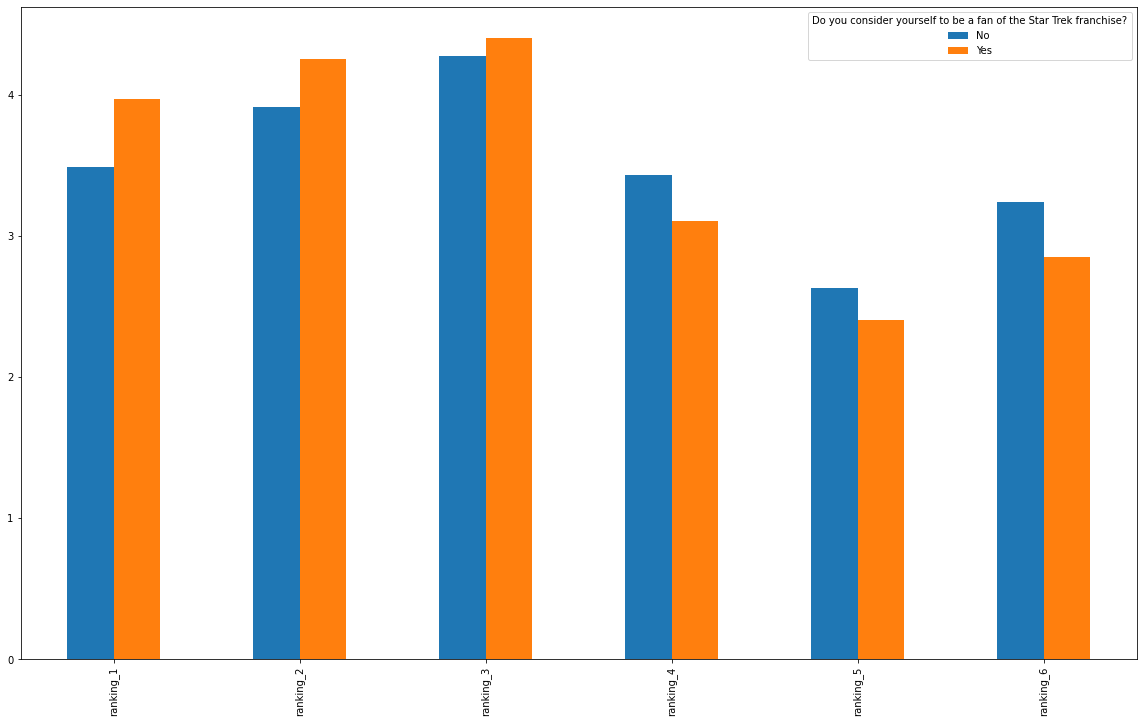

In [102]:
star_wars.groupby(star_wars.columns[-6]).apply(find_highest_rated_movies).T.plot(kind='bar',figsize=(20,12))

# Fans of Star Trek Universe also rate prequels higher

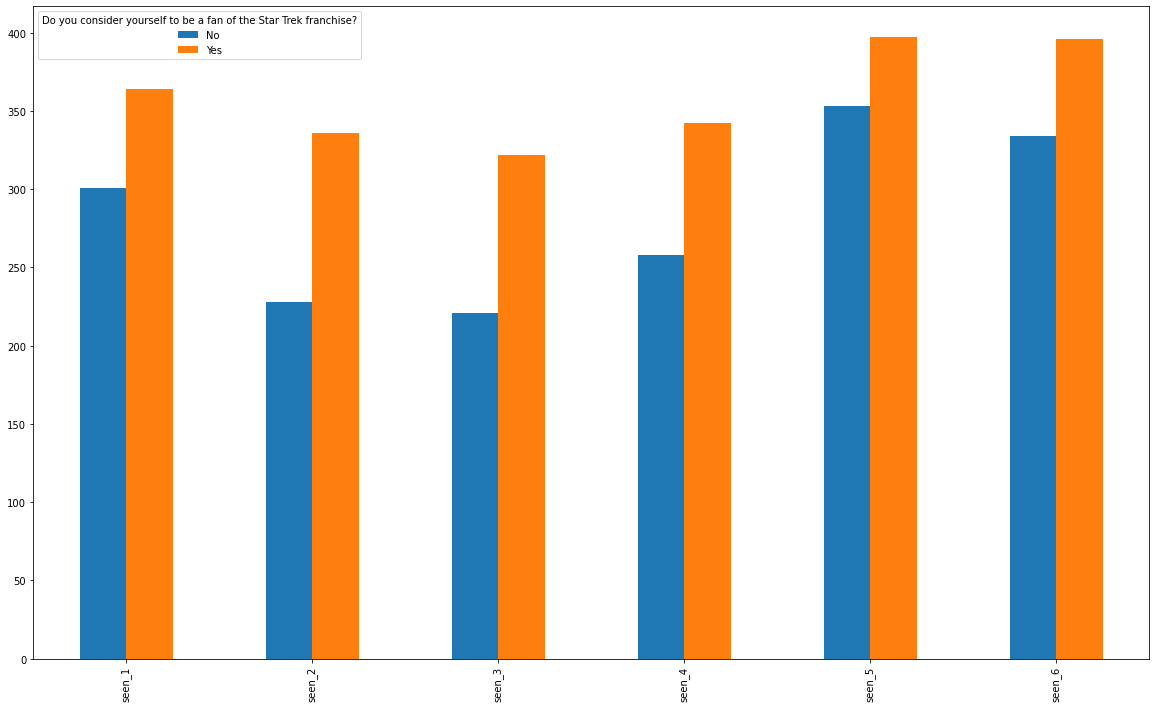

In [106]:
star_wars.groupby(star_wars.columns[-6]).apply(find_most_watched_movies).T.plot(kind='bar',figsize=(20,12))

# Star Trek fans watched more than non Star Trek fans and watched prequels more than sequels

<hr>

# Stratify by Gender

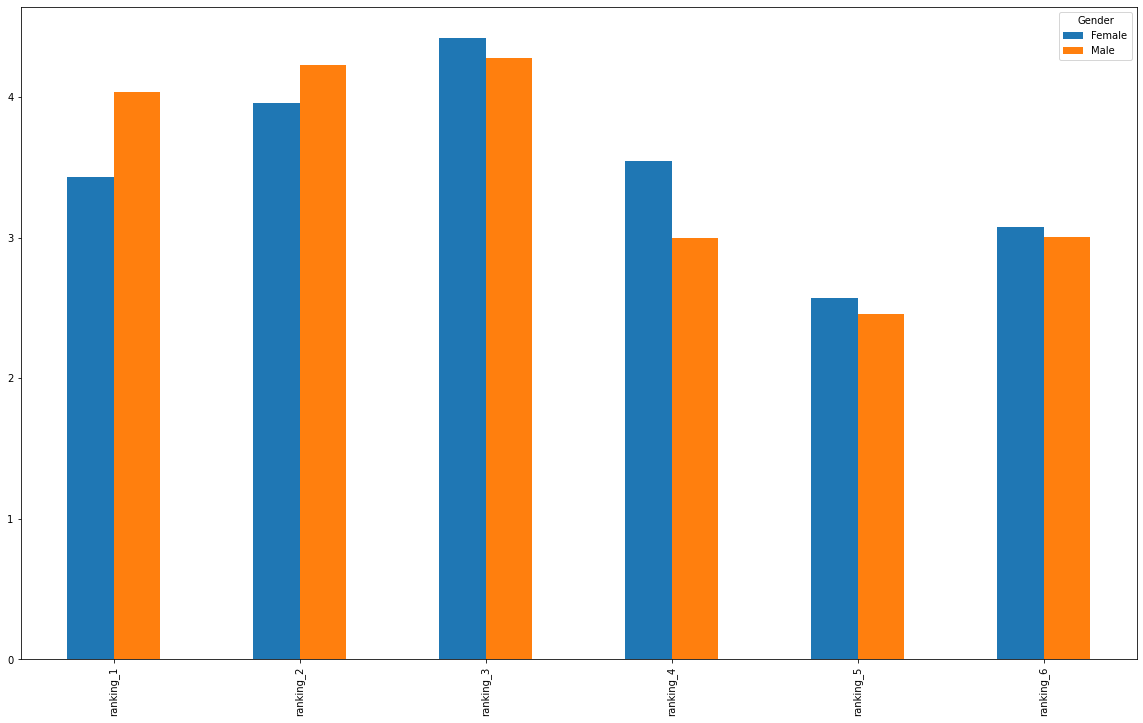

In [109]:
star_wars.groupby(star_wars.columns[-5]).apply(find_highest_rated_movies).T.plot(kind='bar',figsize=(20,12))

# Females and males tend to rate similarly with both rating the sequels as higher

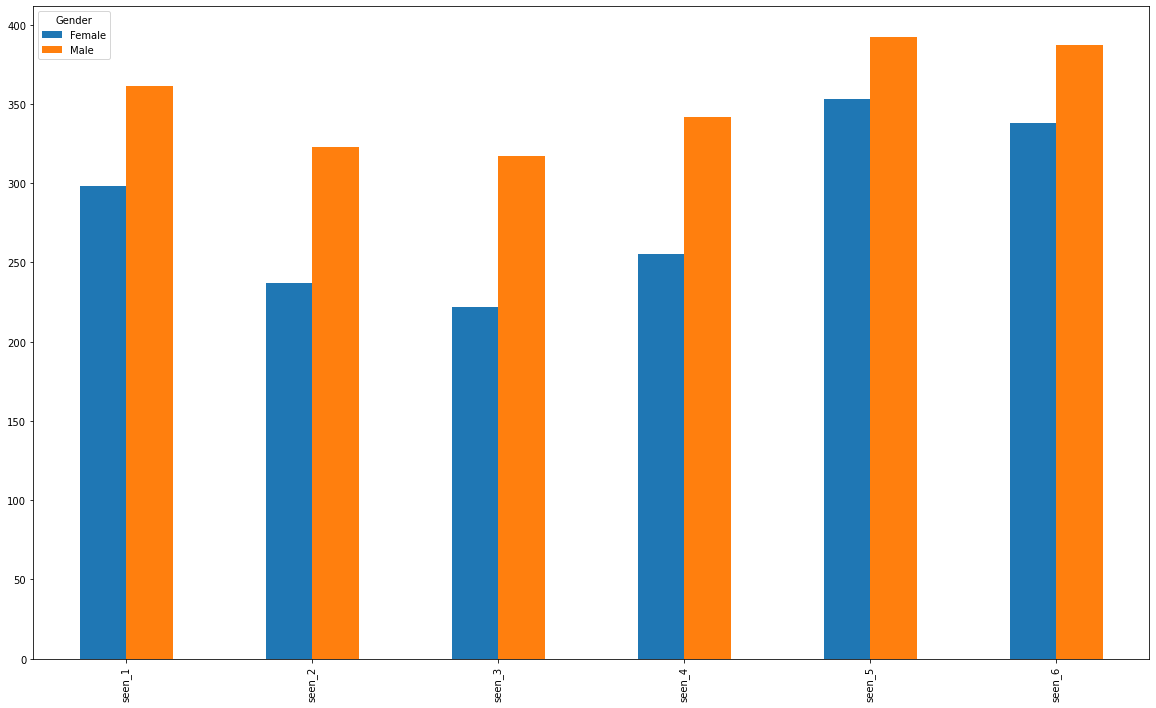

In [111]:
star_wars.groupby(star_wars.columns[-5]).apply(find_most_watched_movies).T.plot(kind='bar',figsize=(20,12))

# Males watched more than Females but again, last two movies were both watched significantly more than other movies